# COVID-19 Dashboard

Data Exploring Notebook

## Import Libraries/Functions

In [45]:
import pandas as pd
import plotly.express as px
import plotly
import ipywidgets as widgets

## Import Data

In [15]:
# Live COVID-19 Data by John Hopkins University, Center for Systems Science and Engineering
covid_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/web-data/data/cases_country.csv')
covid_df = covid_df.rename(columns={
    'Country_Region': 'Country',
    'Long_': 'Long'
})
display(covid_df)

,Country,Last_Update,Lat,Long,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Cases_28_Days,Deaths_28_Days
0,Afghanistan,2021-09-28 16:21:48,33.939110,67.709953,155093,7201,NaN,NaN,398.406395,NaN,NaN,4.643021,4,AFG,1924,84
1,Albania,2021-09-28 16:21:48,41.153300,20.168300,168188,2653,NaN,NaN,5844.325526,NaN,NaN,1.577401,8,ALB,22855,158
2,Algeria,2021-09-28 16:21:48,28.033900,1.659600,202877,5786,NaN,NaN,462.650341,NaN,NaN,2.851974,12,DZA,7303,546
3,Andorra,2021-09-28 16:21:48,42.506300,1.521800,15189,130,NaN,NaN,19658.318773,NaN,NaN,0.855883,20,AND,157,0
4,Angola,2021-09-28 16:21:48,-11.202700,17.873900,55583,1513,NaN,NaN,169.118684,NaN,NaN,2.722055,24,AGO,8252,303
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,Vietnam,2021-09-28 16:21:48,14.058324,108.277199,770640,18936,NaN,NaN,791.710724,NaN,NaN,2.457178,704,VNM,316562,7694
191,West Bank and Gaza,2021-09-28 16:21:48,31.952200,35.233200,398946,4046,NaN,NaN,7820.299305,NaN,NaN,1.014172,275,PSE,59130,371
192,Yemen,2021-09-28 16:21:48,15.552727,48.516388,8988,1703,NaN,NaN,30.134814,NaN,NaN,18.947486,887,YEM,1159,234
193,Zambia,2021-09-28 16:21:48,-13.133897,27.849332,208912,3647,NaN,NaN,1136.382180,NaN,NaN,1.745711,894,ZMB,2722,48


## Feature Description
- Country : Country Namesb  bbnbnbnbnbn
- Last Update : MM/DD/YYYY HH:mm:ss (24 hour format, in UTC).
- Lat and Long : Dot locations on the dashboard. All points (except for Australia) shown on the map are based on geographic centroids, and are not representative of a specific address, building or any location at a spatial scale finer than a province/state. Australian dots are located at the centroid of the largest city in each state.
- Confirmed : Counts include confirmed and probable (where reported).
- Deaths : Counts include confirmed and probable (where reported).
- Recovered : Recovered cases are estimates based on local media reports, and state and local reporting when available, and therefore may be substantially lower than the true number. US state-level recovered cases are from COVID Tracking Project.
- Incident_Rate : Incidence Rate = cases per 100,000 persons.
- Case_Fatality_Ratio (%) : Case-Fatality Ratio (%) = Number recorded deaths / Number cases.

In [9]:
covid_df = covid_df.drop(columns=['People_Tested', 'People_Hospitalized'])
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         195 non-null    object 
 1   Last_Update     195 non-null    object 
 2   Lat             193 non-null    float64
 3   Long            193 non-null    float64
 4   Confirmed       195 non-null    int64  
 5   Deaths          195 non-null    int64  
 6   Recovered       0 non-null      float64
 7   Active          0 non-null      float64
 8   Incident_Rate   192 non-null    float64
 9   Mortality_Rate  195 non-null    float64
 10  UID             195 non-null    int64  
 11  ISO3            192 non-null    object 
 12  Cases_28_Days   195 non-null    int64  
 13  Deaths_28_Days  195 non-null    int64  
dtypes: float64(6), int64(5), object(3)
memory usage: 21.5+ KB


## Data Visualisation

In [29]:
covid_df[['Lat', 'Long', 'Country', sidebar]].dropna()

,Lat,Long,Country,Confirmed
0,33.939110,67.709953,Afghanistan,155093
1,41.153300,20.168300,Albania,168188
2,28.033900,1.659600,Algeria,202877
3,42.506300,1.521800,Andorra,15189
4,-11.202700,17.873900,Angola,55583
...,...,...,...,...
190,14.058324,108.277199,Vietnam,770640
191,31.952200,35.233200,West Bank and Gaza,398946
192,15.552727,48.516388,Yemen,8988
193,-13.133897,27.849332,Zambia,208912


In [59]:
import plotly.graph_objects as go
go.Scattergeo()


Scattergeo()

In [62]:
df = px.data.gapminder()
fig = px.choropleth(df, locations="iso_alpha", color="lifeExp", hover_name="country", animation_frame="year", range_color=[20,80])
fig.show()

In [71]:
covid_df[['Lat', 'Long', 'Country', sidebar]].dropna()

,Lat,Long,Country,Confirmed
0,33.939110,67.709953,Afghanistan,155093
1,41.153300,20.168300,Albania,168188
2,28.033900,1.659600,Algeria,202877
3,42.506300,1.521800,Andorra,15189
4,-11.202700,17.873900,Angola,55583
...,...,...,...,...
190,14.058324,108.277199,Vietnam,770640
191,31.952200,35.233200,West Bank and Gaza,398946
192,15.552727,48.516388,Yemen,8988
193,-13.133897,27.849332,Zambia,208912


In [79]:
sidebar='Confirmed'
fig = px.scatter_mapbox(covid_df[['Lat', 'Long', 'Country', sidebar]].dropna(),
    lat='Lat',
    lon='Long',
    hover_name='Country',
    color=sidebar,
    mapbox_style="carto-positron",
    size=sidebar,
    size_max=50,
    color_continuous_scale = ['deepskyblue','red'],
    zoom=.5
)

fig.show()

In [47]:
sidebar='Confirmed'

bubble_map = px.scatter_geo(data_frame=covid_df[['Lat', 'Long', 'Country', sidebar]].dropna(),
    lat='Lat',
    lon='Long',
    hover_name='Country', 
    locations='Country',
    size=sidebar,
    projection='robinson',
    color=sidebar,
    size_max=50,
    color_continuous_scale = ['deepskyblue','red']
)

bubble_map.show()

In [25]:
sidebar='Confirmed'

bubble_map = px.scatter_geo(covid_df[['Lat', 'Long', 'Country', sidebar]].dropna(),
    lat='Lat',
    lon='Long',
    hover_name='Country', 
    size=sidebar, 
    # projection='robinson',
    color=sidebar,
    # size_max=50,
    # color_continuous_scale = ['deepskyblue','red']
)
# bubble_map.update_geos(
#     resolution=110,
#     showcoastlines=True, coastlinecolor="RebeccaPurple",
#     showland=True, landcolor="LightGreen",
#     showocean=True, oceancolor="LightBlue",
#     showlakes=True, lakecolor="Blue",
#     showrivers=True, rivercolor="Blue"
# )
# bubble_map.update_layout(
#     height=350, 
#     margin={"r":15,"t":15,"l":15,"b":15}, 
#     paper_bgcolor='white'
# )

bubble_map.show()

In [11]:
threshold = 10
bar = px.bar(covid_df[['Country', sidebar]].dropna().sort_values(sidebar, ascending=False)[:threshold], 
    y=sidebar,
    x='Country', 
    color=sidebar,
    color_continuous_scale=px.colors.sequential.Viridis
)
bar.update_layout(
    height=400, 
    margin={"r":15,"t":15,"l":15,"b":15},
    paper_bgcolor='white'
)
bar.show()

<AxesSubplot:xlabel='Country'>

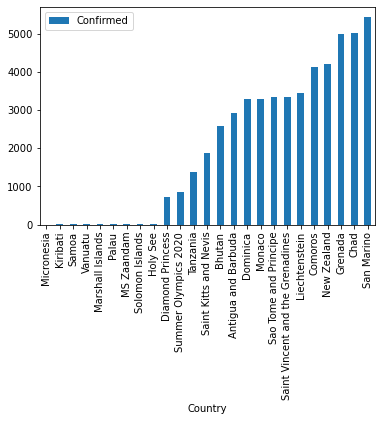

In [12]:
covid_df[['Confirmed', 'Country']].sort_values(by='Confirmed')[:25].plot.bar(x='Country', y='Confirmed')